In [1]:
import sys
import os
import re
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

%matplotlib inline

In [2]:
# Returns a list of sugar counts if the country is in the tag
def return_sugars(df, country):
    sugar_index = df.columns.get_loc('sugars_100g')
    country_index = df.columns.get_loc('countries_tags')
    return [row[sugar_index] for index, row in df.iterrows() if country in row[country_index]]

def return_category_tags(df, country):
    product_index = df.columns.get_loc('categories_en')
    country_index = df.columns.get_loc('countries_tags')
    return [row[product_index] for index, row in df.iterrows() if country in row[country_index]]

def parse_category(list_of_category):
    categorized_dict = defaultdict(int)
    for category_list in list_of_category:
        for category in str(category_list).split(",")[:1]:
            categorized_dict[category] += 1
    return categorized_dict

def condense_food_dictionary(raw_dict):
    pass
    

In [4]:
# Just the data reading step. I check if the path for the file exist, and if so, ready the data from the file
data_directory = os.getcwd()
data_path = 'data\world-food-facts\FoodFacts.csv'
data_path = os.path.join(data_directory, data_path)

if os.path.exists(data_path): 
    world_food_facts = pd.read_csv(data_path)
    world_food_facts.countries = world_food_facts.countries.str.lower()
    print("Data loaded. There are {} rows".format(world_food_facts.shape[0]))
else:
    print("Error: source data location: {} does not exist".format(data_path))

Data loaded. There are 65503 rows


C:\Users\dsharp\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (0,3,5,27,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# For my approach, I need to remove the rows where the countries_tags and sugars_100g are null
worlds_sugars = world_food_facts[(world_food_facts.countries_tags.notnull() & world_food_facts.sugars_100g.notnull())]
"After removing rows where countries_tags and sugars_100g columns are null, there are {} rows".format(len(worlds_sugars))

'After removing rows where countries_tags and sugars_100g columns are null, there are 32611 rows'

In [6]:
country_tags = []
for index, item in worlds_sugars.iterrows():
    country_tokens = item.countries_tags.split(",")
    if len(country_tokens) > 1:
        for country in country_tokens:
            if ":" in country and country.split(":")[1] not in country_tags:
                country_tags.append(country.split(":")[1])
    else:
        if ":" in country_tokens and country_tokens.split(":")[1] not in country_tags:
            country_tags.append(country.split(":")[1])

In [7]:
country_tags[:5]

['france', 'united-kingdom', 'united-states', 'australia', 'new-zealand']

In [8]:
len(set(country_tags))

69

In [9]:
num = return_sugars(worlds_sugars, '日本')
print(len(num))
np.mean(return_sugars(worlds_sugars, '日本'))

1


0.0

In [10]:
sugar_mean_dic = {}
for country in country_tags:
    print("looking for country: {}".format(country))
    sugar = return_sugars(worlds_sugars, country)
    if len(sugar) > 9:
        sugar_mean_dic[country] = np.mean(sugar)

looking for country: france
looking for country: united-kingdom
looking for country: united-states
looking for country: australia
looking for country: new-zealand
looking for country: singapore
looking for country: thailand
looking for country: denmark
looking for country: spain
looking for country: canada
looking for country: quebec
looking for country: czech-republic
looking for country: indonesia
looking for country: italy
looking for country: french-guiana
looking for country: switzerland
looking for country: belgium
looking for country: philippines
looking for country: europe
looking for country: lithuania
looking for country: portugal
looking for country: germany
looking for country: netherlands
looking for country: austria
looking for country: romania
looking for country: scotland
looking for country: morocco
looking for country: ireland
looking for country: guadeloupe
looking for country: monaco
looking for country: reunion
looking for country: luxembourg
looking for country: j

In [11]:
sugar_mean_dic.keys()

dict_keys(['austria', 'french-guiana', 'netherlands', 'portugal', 'france', 'czech-republic', 'denmark', 'sweden', 'united-states', 'australia', 'greece', 'italy', 'united-kingdom', 'poland', 'luxembourg', 'martinique', 'switzerland', 'spain', 'romania', 'canada', 'europe', 'tunisia', 'hong-kong', 'guadeloupe', 'new-zealand', 'belgium', 'quebec', 'reunion', 'germany', 'thailand', 'saint-pierre-and-miquelon'])

In [12]:
sugar_mean_sorted_list = sorted(sugar_mean_dic.items(), key=operator.itemgetter(1))

In [13]:
sugar_mean_sorted_list.reverse()

In [14]:
for country in sugar_mean_sorted_list[:2]:
    print(country[0])

tunisia
quebec


In [18]:
country_list = [pair[0] for pair in sugar_mean_sorted_list]
sugar_list = [pair[1] for pair in sugar_mean_sorted_list]

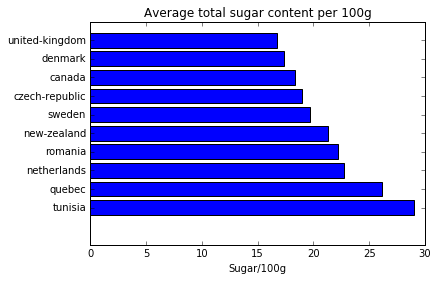

In [41]:
y_pos = np.arange((len(country_list[:10])))
barwidth = 0.25
plt.barh(y_pos, sugar_list[:10], align='center')
plt.title('Average total sugar content per 100g')
plt.yticks(y_pos, country_list[:10])
plt.xlabel('Sugar/100g')
#plt.tick_params(axis='x', pad=95)
#plt.autofmt_xdate()
#plt.setp(plt.xticks()[1], rotation=90)
plt.show()

In [42]:
country_list[0]

'tunisia'

In [43]:
country_products = return_category_tags(worlds_sugars, country_list[0])

In [42]:
country_list[0]

'tunisia'

In [45]:
from collections import defaultdict

type_dic = defaultdict(int)
for product in country_products:
    for type in str(product).split(","):
        type_dic[type] += 1
    

In [46]:
country_product = []
for country in country_list:
    country_product.append(return_category_tags(worlds_sugars, country))

In [50]:
all_type_dic = defaultdict(int)
for product_list in country_product:
    for product in product_list:
        for type in str(product).split(","):
            all_type_dic[type] += 1

In [61]:
us_category_list = return_category_tags(worlds_sugars, country_list[10])

In [62]:
parsed_us_dict = parse_category(us_category_list)

In [53]:
a = sorted(all_type_dic.items(), key=operator.itemgetter(1), reverse=True)

In [64]:
us_categroy_dict_sorted=sorted(parsed_us_dict.items(), key=operator.itemgetter(1), reverse=True)

In [66]:
us_categroy_dict_sorted.pop('nan')

TypeError: 'str' object cannot be interpreted as an integer